[[0.95888475 0.43903469]
 [0.14175883 0.35806997]
 [0.73720842 0.98791482]]


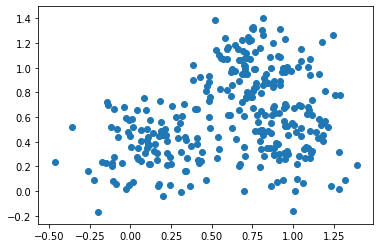

In [111]:
# All examples assume 2 dimensions

import numpy as np
import matplotlib.pyplot as plt

# Generates n datapoints in the unit square
def generate_uniform_data(n):
    data = np.random.uniform(low=0,high=1,size=(n,2))
    return data

def generate_gaussian_data(n,seed,var):
    data = np.random.normal(seed,var,(n,2))
    return data

seeds = generate_uniform_data(3)
print(seeds)
d1 = generate_gaussian_data(100,seeds[0],0.2)
d2 = generate_gaussian_data(100,seeds[1],0.2)
d3 = generate_gaussian_data(100,seeds[2],0.2)
data = np.concatenate((d1,d2,d3))
x = [d[0] for d in data]
y = [d[1] for d in data]
plt.scatter(x,y)
    

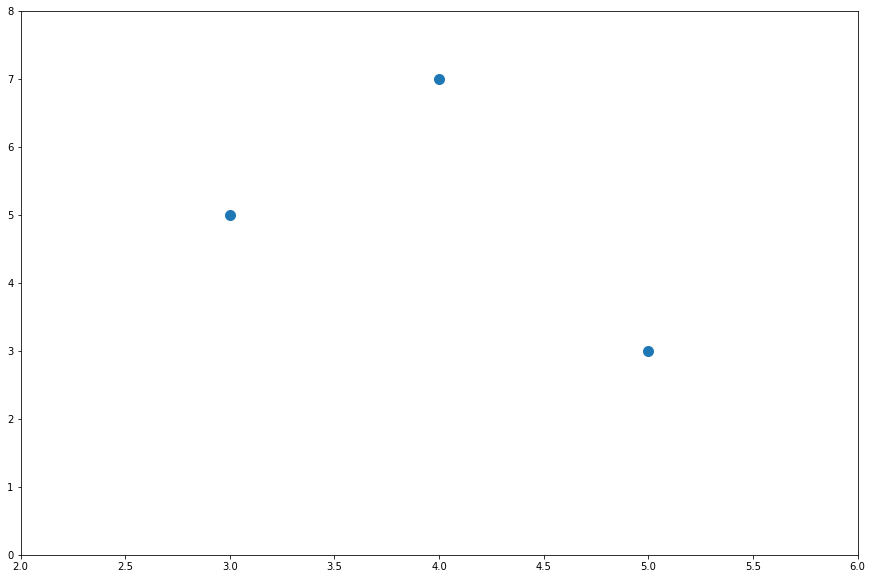

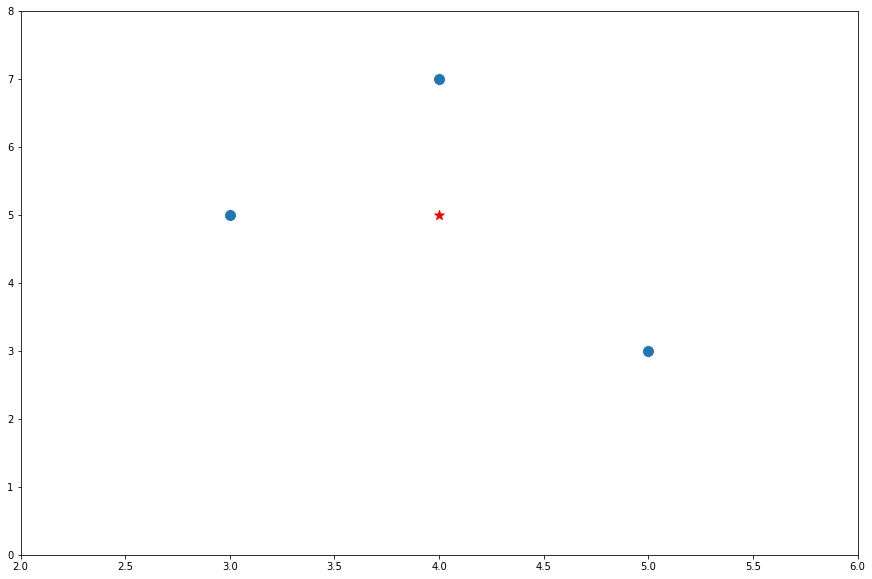

[4.0, 5.0]


In [240]:
def compute_centroid(data):
    x = [d[0] for d in data]
    y = [d[1] for d in data]
    centroid_x = sum(x)/len(x)
    centroid_y = sum(y)/len(y)
    return [centroid_x,centroid_y]

def plot_data_centroid(data):
    x = [d[0] for d in data]
    y = [d[1] for d in data]
    centroid = compute_centroid(data)
    plt.figure(figsize=(15,10))
    plt.xlim([2, 6])
    plt.ylim([0, 8])
    plt.scatter(x,y,s=100)
    plt.show()
    plt.figure(figsize=(15,10))
    plt.xlim([2, 6])
    plt.ylim([0, 8])
    plt.scatter(x,y,s=100)
    plt.scatter(centroid[0],centroid[1],marker="*",s=100,c='red')
    plt.show()
    print(centroid)
    

mock_data = [[5,3],[3,5],[4,7]]
plot_data_centroid(mock_data)

[[0.68659503 1.22741302]
 [0.79904474 0.40483068]
 [0.2443932  0.05235569]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2
 2 1 2 2 2 2 1 2 2 1 2 2 2 2 2 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0]


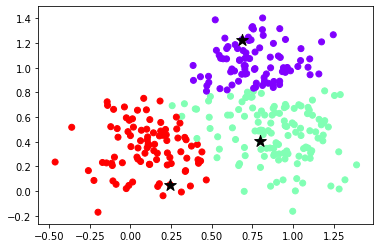

[[0.7628766  1.04620703]
 [0.88852514 0.47168582]
 [0.10585044 0.34718549]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2
 2 1 2 2 2 2 1 2 2 1 2 2 2 2 2 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0]


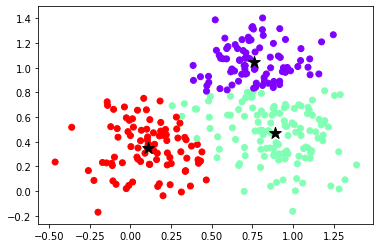

False
[[0.75406555 1.0175576 ]
 [0.93772376 0.43530821]
 [0.12131859 0.36469504]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2
 2 0 2 2 2 2 1 2 2 1 2 2 2 2 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0]


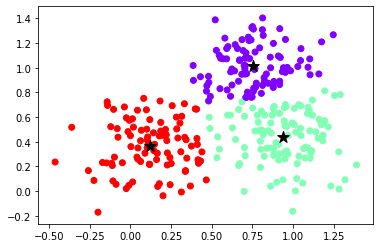

False
[[0.7533698  1.0145299 ]
 [0.95269495 0.4318454 ]
 [0.13286765 0.36755776]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0]


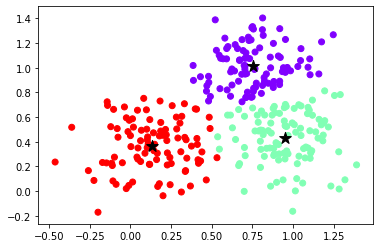

False
[[0.75247425 1.01092278]
 [0.96367175 0.43039692]
 [0.14096753 0.36801009]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0]


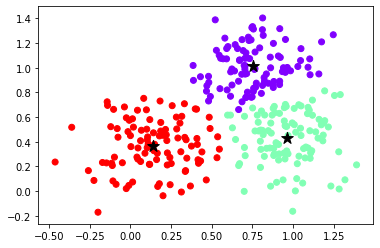

False
[[0.75247425 1.01092278]
 [0.96367175 0.43039692]
 [0.14096753 0.36801009]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0]


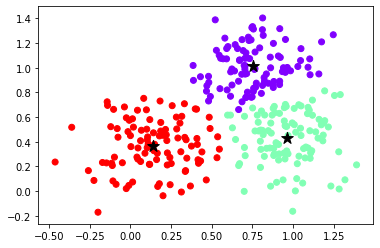

True
5


In [264]:

import matplotlib.cm as cm


class partition:
    
    def __init__(self,k,data,labels=None,method="random"):
        self.k = k
        self.x =[d[0] for d in data]
        self.y =[d[1] for d in data]
        self.centroids = None
        self.labels = np.zeros(len(self.x),dtype=int)
        
        if method=="random":
            self.labels = np.asarray([np.random.choice(k) for i in range(len(data))])
            self.calculate_centroids()
#             print(self.labels)
#             print(self.centroids)
            
        elif method=="Forgy":
            centroid_indexes = np.random.choice(range(len(data)),size=(k),replace=False)
#             print(centroid_indexes)
            self.centroids = np.asarray([[self.x[idx],self.y[idx]] for idx in centroid_indexes])
#             print(self.centroids)
            self.reassign_labels()
#             print(self.labels)
#             print(self.labels)
#             print(self.centroids)
        else:
            self.labels=labels
            self.calculate_centroids()
    
    def calculate_centroids(self):
        self.centroids = np.zeros((self.k,2))
#         print("Recalculating centroids")
#         print(self.centroids)
        count = np.zeros(self.k)
        
#         print(self.labels)
        for x,y,l in zip(self.x,self.y,self.labels):
            self.centroids[l][0] += x
            self.centroids[l][1] += y
            count[l]+=1
        
        for l in range(self.k):
            if count[l] > 0:
                self.centroids[l] /= count[l]
            else:
                raise ValueError("One of the clusters has zero elements!") 
#         print(self.centroids)
    
    def reassign_labels(self):
        no_change = True
        new_labels = np.zeros(len(self.x),dtype=int)
#         print("recalculating labels")
#         print(self.labels)
        idx = 0
        min_dist = float('inf')
        best_label = -1
        for x,y in zip(self.x,self.y):
            min_dist = float('inf')
            best_label = -1
#             print("new data point")
            for l in range(self.k):
                c = self.centroids[l]
                d = np.linalg.norm(c-np.asarray((x,y)))
#                 print(d)
                if d < min_dist:
                    min_dist=d
                    best_label = int(l)
            new_labels[idx] = int(best_label)
            if no_change and new_labels[idx] != self.labels[idx]:
                no_change = False
#             print(best_label)
            idx+=1
        self.labels = new_labels
        return no_change
    
    def plot(self,name=None):
#       Add normal points to the plot
        colors = [pallette[l] for l in self.labels]
        plt.scatter(self.x,self.y,c=colors)
#       Add centroids to the plot
        colors = [pallette[l] for l in range(self.k)]
        x =  [c[0] for c in self.centroids]
        y =  [c[1] for c in self.centroids]
        print(self.centroids)
        print(self.labels)
        plt.scatter(x,y,c="black",marker="*",s=150)
        if name:
            plt.savefig(name)
        plt.show()
        
        


def k_means(k,data,max_epochs=float('inf'),method="Forgy"):
    
    p = partition(k,data,method = method)
    p.plot(method+str(0))
    stop = False
    current_epoch = 0
    while not stop and current_epoch<max_epochs:
        stop = p.reassign_labels()
        if method == "Forgy" and current_epoch == 0:
            stop = False
        p.calculate_centroids()
        p.plot(method+str(current_epoch+1))
        print(stop)
        current_epoch+=1
    print(current_epoch)
        
   
k=3
pallette = cm.rainbow(np.linspace(0, 1, k))
k_means(k,data,10, method = "Forgy")
    
    
    

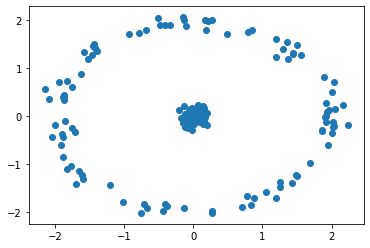

[[-0.02555601  0.15912658]
 [-1.86601721  0.43340994]]
[0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


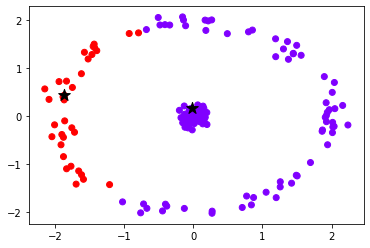

[[ 0.36931416  0.0210324 ]
 [-1.69081461  0.17333001]]
[0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


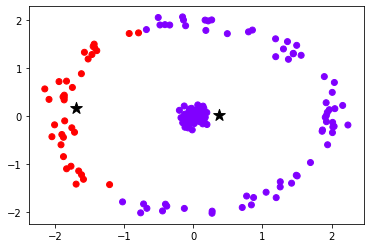

False
[[ 0.38428673  0.02124002]
 [-1.64541653  0.16418305]]
[0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


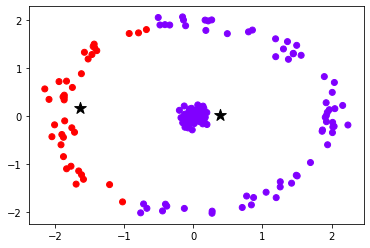

False
[[ 0.38978953  0.00868996]
 [-1.61546257  0.21392426]]
[0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


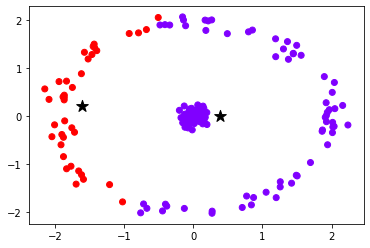

False
[[ 0.3952064  -0.00304713]
 [-1.58640784  0.25711498]]
[0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


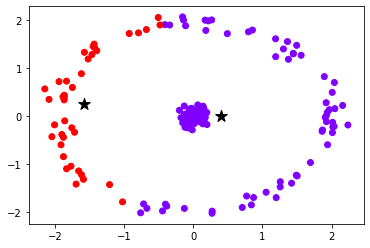

False
[[ 0.40023822 -0.01497457]
 [-1.55699473  0.29832069]]
[0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


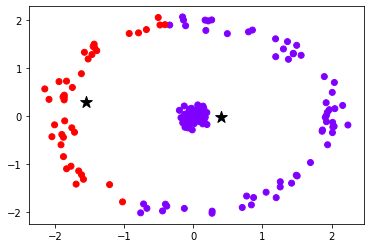

False
[[ 0.40489976 -0.02700133]
 [-1.52733505  0.33731969]]
[0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


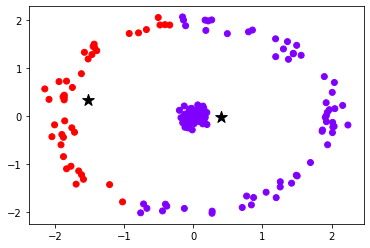

False
[[ 0.40489976 -0.02700133]
 [-1.52733505  0.33731969]]
[0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


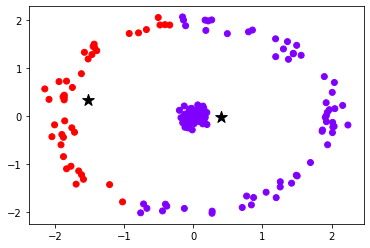

True
7


In [288]:
# Non-convex clusters
from math import pi, cos, sin

def point(center, radius, var):
    theta = np.random.uniform(low=0,high=2 * pi)
    r = np.random.normal(radius,var)
    return (center[0] + cos(theta) * r, center[1] + sin(theta) * r)

circumference = np.asarray([point((0,0),2,0.1) for _ in range(100)])
center = generate_gaussian_data(100, (0,0),0.1)
non_convex =  np.concatenate((circumference,center))
x = [d[0] for d in non_convex]
y = [d[1] for d in non_convex]
plt.scatter(x,y)
plt.show()

k=2
pallette = cm.rainbow(np.linspace(0, 1, k))
k_means(k,non_convex,10, method = "Forgy")

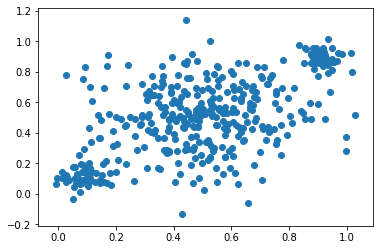

[[0.48865214 0.47570528]
 [0.64127079 0.65216994]
 [0.28394484 0.4486348 ]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 2 0 1 1 0 0 0 0 1 1 0 1 1 0 0 2 1 0 1
 2 1 1 1 0 0 0 1 0 2 0 2 0 1 0 1 2 0 0 0 2 1 2 1 2 2 2 2 2 0 1 1 0 1 0 0 1
 0 2 2 0 1 2 2 2 2 1 2 0 0 2 1 1 2 1 2 2 0 2 0 2 2 2 1 1 2 1 1 1 2 0 0 0 0
 1 1 0 1 1 1 0 1 0 1 1 0 2 2 0 0 2 0 1 0 0 2 0 0 1 0 2 0 1 2 1 0 0 2 0 2 0
 1 1 0 0 0 0 0 1 0 0 0 2 1 2 0 2 2 0 0 2 2 0 0 0 2 0 0 2 2 2 2 1 1 2 0 2 0
 0 1 2 2 0 2 1 0 0 2 0 0 1 0 2 1 0 1 0 0 2 1 2 0 2 1 1 1 1 2 1 1 1 0 1 2 2
 0 1 2 1 0 0 2 1 1 2 0 0 2 1 1 1 0 1 1 2 2 0 0 2 1 1 0 1 1 1 2 0 1 1 1 2 2
 2 0 0 1 1 0 0 1 1 1 1 1 0 2 2 0 1 2 0 0 0 0 0 0 0 1 2 0 1 0 0 1 2 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


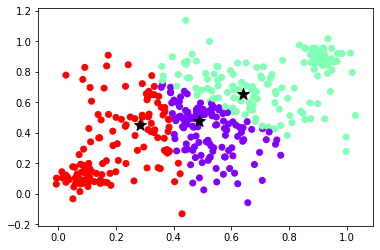

[[0.52181754 0.41311491]
 [0.73650663 0.74567636]
 [0.20289392 0.32475118]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 2 0 1 1 0 0 0 0 1 1 0 1 1 0 0 2 1 0 1
 2 1 1 1 0 0 0 1 0 2 0 2 0 1 0 1 2 0 0 0 2 1 2 1 2 2 2 2 2 0 1 1 0 1 0 0 1
 0 2 2 0 1 2 2 2 2 1 2 0 0 2 1 1 2 1 2 2 0 2 0 2 2 2 1 1 2 1 1 1 2 0 0 0 0
 1 1 0 1 1 1 0 1 0 1 1 0 2 2 0 0 2 0 1 0 0 2 0 0 1 0 2 0 1 2 1 0 0 2 0 2 0
 1 1 0 0 0 0 0 1 0 0 0 2 1 2 0 2 2 0 0 2 2 0 0 0 2 0 0 2 2 2 2 1 1 2 0 2 0
 0 1 2 2 0 2 1 0 0 2 0 0 1 0 2 1 0 1 0 0 2 1 2 0 2 1 1 1 1 2 1 1 1 0 1 2 2
 0 1 2 1 0 0 2 1 1 2 0 0 2 1 1 1 0 1 1 2 2 0 0 2 1 1 0 1 1 1 2 0 1 1 1 2 2
 2 0 0 1 1 0 0 1 1 1 1 1 0 2 2 0 1 2 0 0 0 0 0 0 0 1 2 0 1 0 0 1 2 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


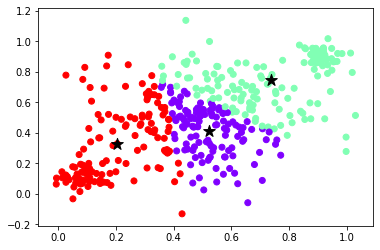

False
[[0.51432069 0.44716642]
 [0.74935059 0.78223895]
 [0.17402566 0.27254313]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1
 2 1 1 0 0 0 0 1 0 2 0 2 0 1 0 1 2 0 0 0 2 1 2 1 2 2 0 0 2 0 1 1 0 1 0 0 0
 0 2 2 0 1 2 2 2 2 1 2 0 0 2 0 1 2 1 1 2 0 2 0 0 2 2 0 0 2 1 1 1 2 0 0 0 0
 0 1 0 1 1 1 0 1 0 1 1 0 2 2 0 0 0 0 0 0 0 2 0 0 1 0 2 0 1 2 1 0 0 0 0 2 0
 1 1 0 0 0 0 0 0 0 0 0 2 1 2 0 0 2 0 0 2 0 0 0 0 2 0 0 2 2 0 0 1 1 0 0 0 0
 0 1 2 0 0 2 0 0 0 2 0 0 1 0 2 1 0 1 0 0 0 1 2 0 2 1 1 1 1 0 1 1 0 0 0 2 0
 0 1 2 1 0 0 2 1 1 2 0 0 0 0 1 0 0 1 1 2 2 0 0 2 1 1 0 1 0 0 2 0 1 1 1 2 0
 2 0 0 1 0 0 0 1 1 1 0 1 0 0 2 0 1 2 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


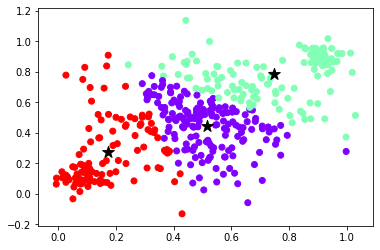

False
[[0.50218556 0.47117869]
 [0.77048287 0.7958202 ]
 [0.16682843 0.23324471]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 1 1 0 0 0 0 0 0 2 0 2 0 1 0 1 2 0 0 0 0 1 2 1 2 2 0 0 2 0 1 1 0 1 0 0 0
 0 0 2 0 1 0 2 2 0 1 2 0 0 2 0 1 2 1 0 2 0 2 0 0 2 0 0 0 2 1 1 1 2 0 0 0 0
 0 1 0 1 1 1 0 1 0 1 1 0 2 0 0 0 0 0 0 0 0 2 0 0 1 0 2 0 1 2 1 0 0 0 0 2 0
 1 1 0 0 0 0 0 0 0 0 0 2 1 0 0 0 2 0 0 2 0 0 0 0 2 0 0 2 2 0 0 1 1 0 0 0 0
 0 1 2 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 2 0 2 0 2 0 1 1 1 0 1 1 0 0 0 2 0
 0 1 2 0 0 0 2 1 1 2 0 0 0 0 0 0 0 1 1 2 2 0 0 2 1 1 0 1 0 0 2 0 0 1 1 0 0
 2 0 2 1 0 0 0 1 0 1 0 0 0 0 2 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 2 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


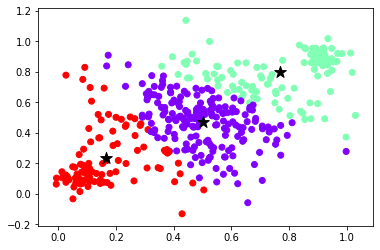

False
[[0.48987477 0.48763152]
 [0.78758718 0.80089362]
 [0.1690452  0.19684664]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 1 1 0 0 0 0 0 0 2 0 2 0 1 0 1 2 0 0 0 0 1 2 1 0 2 0 0 2 0 1 1 0 0 0 0 0
 0 0 2 0 1 0 2 0 0 1 2 0 0 2 0 1 0 1 0 2 0 2 0 0 0 2 0 0 2 1 1 0 0 0 0 0 0
 0 1 0 1 1 1 0 1 0 1 1 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 1 2 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 2 1 0 0 0 2 0 0 2 0 0 0 0 2 0 0 2 0 0 0 1 1 0 0 0 0
 0 1 2 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 2 0 2 0 2 0 1 1 1 0 1 1 0 0 0 2 0
 0 0 2 0 0 0 2 0 1 2 0 0 0 0 0 0 0 1 1 2 2 0 0 0 1 0 0 1 0 0 2 0 0 1 0 0 0
 2 0 2 1 0 0 0 1 0 1 0 0 0 0 2 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 2 0 0 0 0 0 0 1 1 0 2 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


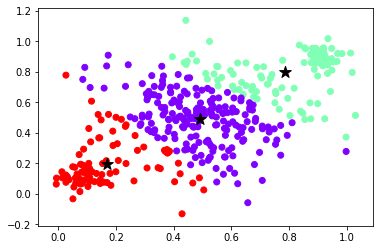

False
[[0.47941066 0.49701984]
 [0.7923846  0.80224796]
 [0.18061936 0.16613757]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 1 1 0 0 0 0 0 0 2 0 2 0 1 0 1 2 0 0 0 0 1 2 1 0 2 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 1 0 2 0 0 0 0 0 0 2 0 1 0 1 0 2 0 2 0 0 0 2 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 1 1 1 0 1 0 1 1 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 1 2 0 0 2 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 2 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 2 0 2 0 2 0 1 1 1 0 1 1 0 0 0 2 0
 0 0 2 0 0 0 2 0 1 2 0 0 0 0 0 0 0 1 1 2 2 0 0 0 1 0 0 1 0 0 2 0 0 0 0 0 0
 2 0 2 1 0 0 0 1 0 1 0 0 0 0 2 0 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 2 0 0 0 0 0 2 1 1 0 2 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


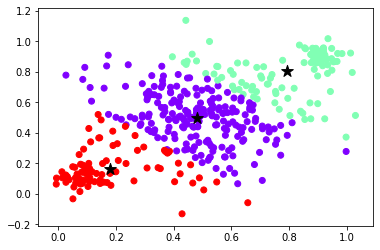

False
[[0.47342948 0.49997676]
 [0.79432879 0.79730106]
 [0.18570426 0.15755245]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 1 1 0 0 0 0 0 0 2 0 2 0 1 0 1 2 0 0 0 0 1 2 1 0 2 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 1 0 2 0 0 0 0 0 0 2 0 1 0 1 0 0 0 2 0 0 0 2 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 1 1 1 0 1 0 1 1 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 1 2 0 0 2 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 2 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 2 0 2 0 2 0 1 1 1 0 1 1 0 0 1 2 0
 0 0 2 0 0 0 2 0 1 2 0 0 0 0 0 0 0 1 1 2 2 0 0 0 1 0 0 1 0 0 2 0 0 0 0 0 0
 2 0 2 1 0 0 0 1 0 1 0 0 0 0 2 0 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 2 0 0 0 0 0 2 1 1 0 2 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


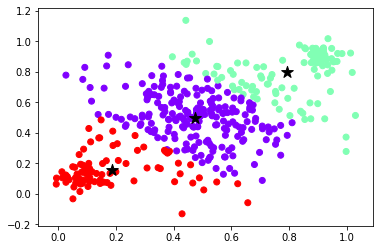

False
[[0.46866841 0.50470918]
 [0.80513489 0.79204689]
 [0.18518164 0.1509046 ]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 2 0 2 0 1 0 1 2 0 0 0 0 1 2 1 0 2 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 1 0 2 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 1 1 1 0 1 0 1 1 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 1 2 0 0 2 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 2 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 2 0 2 0 2 0 1 1 1 0 1 1 0 0 1 2 0
 0 0 2 0 0 0 2 0 1 2 0 0 0 0 0 0 0 1 1 2 2 0 0 0 1 0 0 1 0 0 2 0 0 0 0 0 0
 2 0 2 1 0 0 0 1 0 0 0 0 0 0 0 0 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 2 0 0 0 0 0 2 1 1 0 2 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


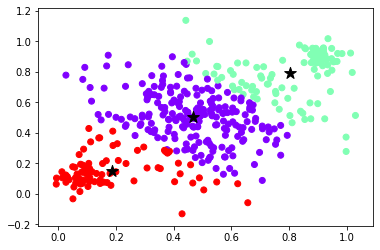

False
[[0.46867386 0.51059334]
 [0.81408687 0.79178037]
 [0.1897955  0.15063842]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 2 0 2 0 1 0 1 2 0 0 0 0 1 2 1 0 2 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 2 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 1 1 0 1 0 1 1 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 1 2 0 0 2 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 2 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 2 0 2 0 2 0 0 1 1 0 1 1 0 0 1 2 0
 0 0 2 0 0 0 2 0 1 2 0 0 0 0 0 0 0 1 1 2 2 0 0 0 1 0 0 1 0 0 2 0 0 0 0 0 0
 2 0 2 1 0 0 0 1 0 0 0 0 0 0 0 0 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 2 0 0 0 0 2 2 1 1 0 2 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


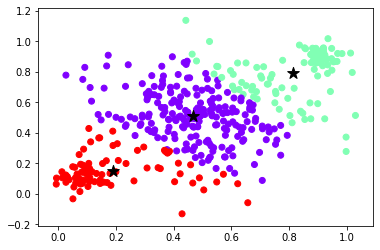

False
[[0.46976151 0.51241925]
 [0.8161195  0.79287184]
 [0.19199767 0.1522787 ]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 2 0 2 0 1 0 0 2 0 0 0 0 1 2 1 0 2 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 2 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 2 0 0 2 1 1 0 0 0 0 0 0
 0 1 0 0 1 1 0 1 0 1 1 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 1 2 0 0 2 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 2 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 2 0 2 0 2 0 0 1 1 0 1 1 0 0 1 2 0
 0 0 2 0 0 0 2 0 1 2 0 0 0 0 0 0 0 1 1 2 2 0 0 0 1 0 0 1 0 0 2 0 0 0 0 0 0
 2 0 2 1 0 0 0 1 0 0 0 0 0 0 0 0 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 2 0 0 0 0 2 2 1 1 0 2 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


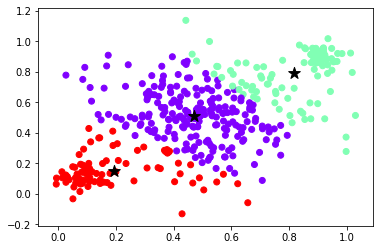

False
[[0.47055553 0.51306625]
 [0.81788565 0.79429308]
 [0.19199767 0.1522787 ]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 2 0 2 0 1 0 0 2 0 0 0 0 1 2 1 0 2 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 2 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 2 0 0 2 1 1 0 0 0 0 0 0
 0 1 0 0 1 1 0 1 0 1 1 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 1 2 0 0 2 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 2 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 2 0 2 0 2 0 0 1 1 0 1 1 0 0 1 2 0
 0 0 2 0 0 0 2 0 1 2 0 0 0 0 0 0 0 1 1 2 2 0 0 0 1 0 0 1 0 0 2 0 0 0 0 0 0
 2 0 2 1 0 0 0 1 0 0 0 0 0 0 0 0 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 2 0 0 0 0 2 2 1 1 0 2 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


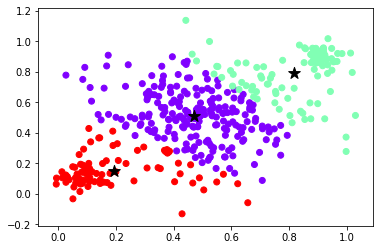

False
10


In [297]:
# Clusters with different sizes

d1 = generate_gaussian_data(50,(0.1,0.1),0.05)
d2 = generate_gaussian_data(300,(0.5,0.5),0.2)
d3 = generate_gaussian_data(50,(0.9,0.9),0.05)

unbalanced_data = np.concatenate((d1,d2,d3))
x = [d[0] for d in unbalanced_data]
y = [d[1] for d in unbalanced_data]
plt.scatter(x,y)
plt.show()

k=3
pallette = cm.rainbow(np.linspace(0, 1, k))
k_means(k,unbalanced_data,10, method = "Forgy")